# Crime Rate Prediction

### Importing necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from os import path

### Reading the dataset

In [2]:
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### Exploratory Data Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [5]:
df.count()

Unnamed: 0              1456714
ID                      1456714
Case Number             1456713
Date                    1456714
Block                   1456714
IUCR                    1456714
Primary Type            1456714
Description             1456714
Location Description    1455056
Arrest                  1456714
Domestic                1456714
Beat                    1456714
District                1456713
Ward                    1456700
Community Area          1456674
FBI Code                1456714
X Coordinate            1419631
Y Coordinate            1419631
Year                    1456714
Updated On              1456714
Latitude                1419631
Longitude               1419631
Location                1419631
dtype: int64

### Taking the sample of 120000 from the dataset.

In [6]:
df1 = df.sample(n=120000)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 378020 to 305892
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            120000 non-null  int64  
 1   ID                    120000 non-null  int64  
 2   Case Number           120000 non-null  object 
 3   Date                  120000 non-null  object 
 4   Block                 120000 non-null  object 
 5   IUCR                  120000 non-null  object 
 6   Primary Type          120000 non-null  object 
 7   Description           120000 non-null  object 
 8   Location Description  119844 non-null  object 
 9   Arrest                120000 non-null  bool   
 10  Domestic              120000 non-null  bool   
 11  Beat                  120000 non-null  int64  
 12  District              120000 non-null  float64
 13  Ward                  119999 non-null  float64
 14  Community Area        119997 non-null  float64


In [8]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

### Dropping the null values 

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [11]:
df.Date=pd.to_datetime(df.Date,format='%m/%d/%Y %I:%M:%S %p')

In [12]:
df.index=pd.DatetimeIndex(df.Date)

In [13]:
df['time_hour']=df['Date'].apply(lambda x:x.hour)

In [14]:
df['month']=df['Date'].apply(lambda x:x.month)

In [15]:
df['year']=df['Date'].apply(lambda x:x.year)

In [16]:
df=df[df['year']!=2017]

In [17]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",23,5,2016
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",21,5,2016
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",23,5,2016
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",22,5,2016
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",22,5,2016


In [18]:
df['Primary Type'].value_counts()

THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2560
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

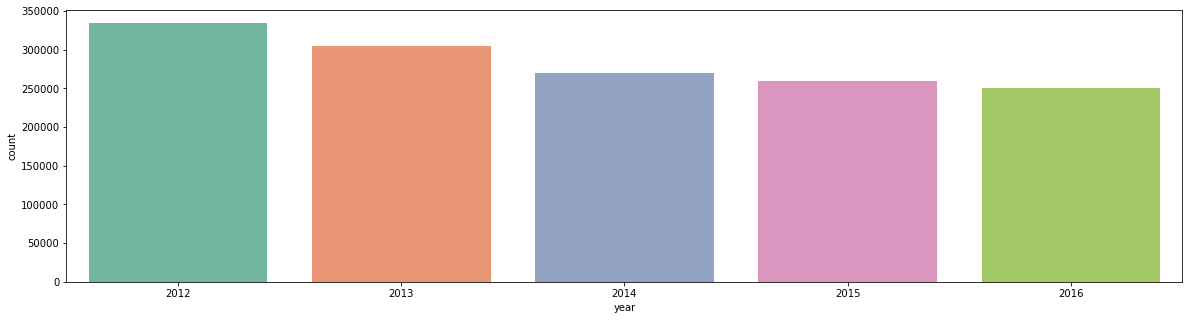

In [19]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=df,x='year',order=df.year.value_counts().index,palette='Set2')

From the above figure, we can observe that crime rate is decreasing over the years from 2012 to 2016 where 2012 have the highest crime rate and 2016 have lowest

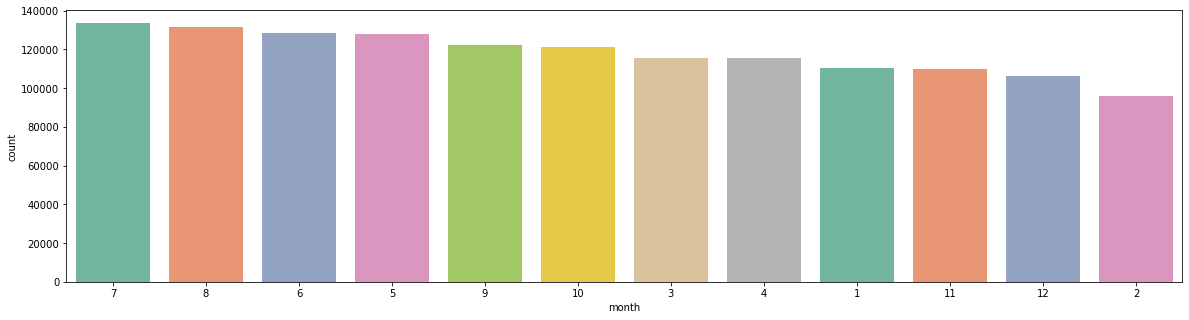

In [20]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=df,x='month',order=df.month.value_counts().index,palette='Set2')

From the above figure we can observe the crime rate with respect to months.

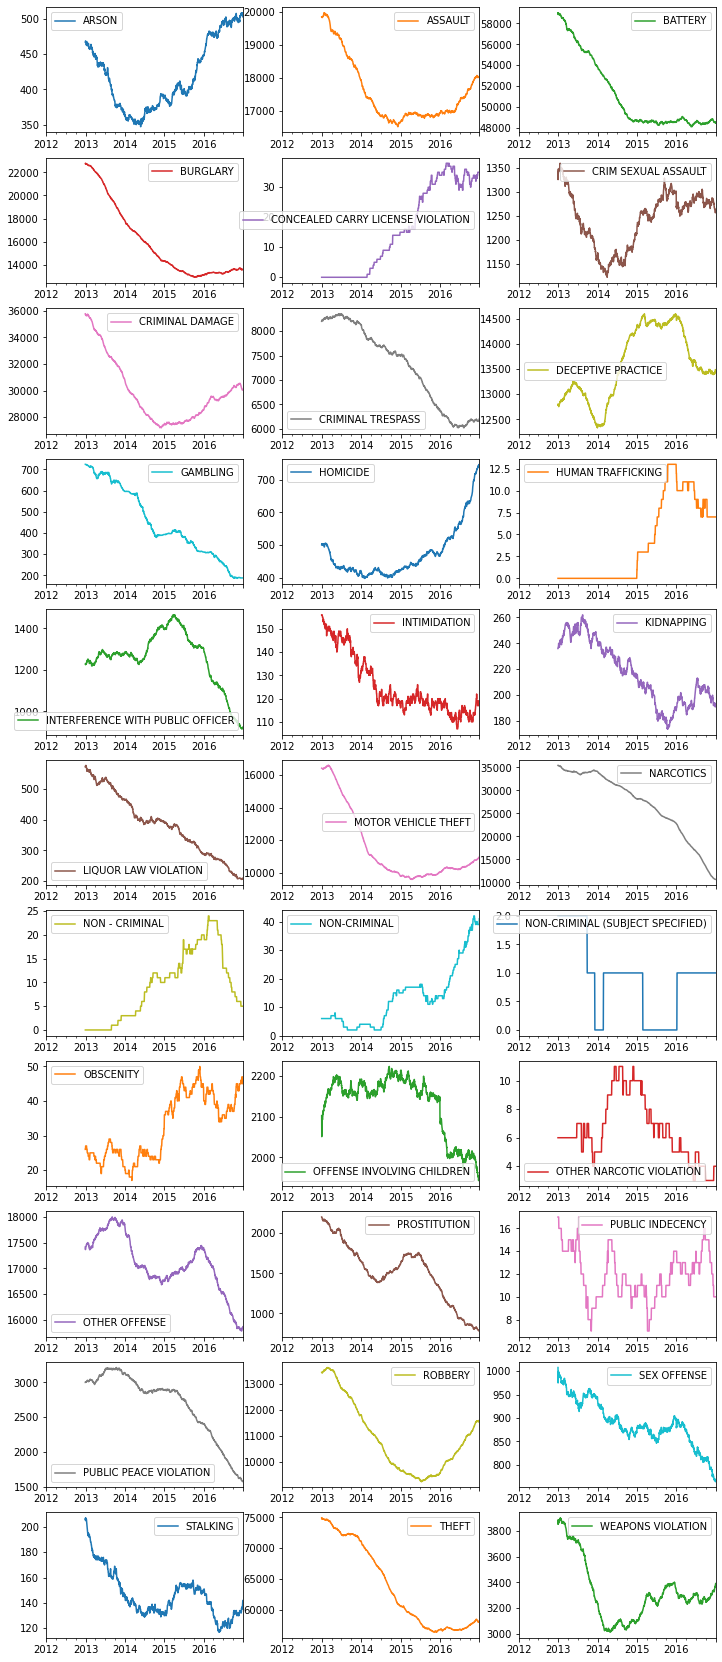

In [21]:
crimes_count_date=df.pivot_table('ID',aggfunc=np.size,columns='Primary Type',index=df.index.date,fill_value=0)
crimes_count_date.index=pd.DatetimeIndex(crimes_count_date.index)
plot=crimes_count_date.rolling(365).sum().plot(figsize=(12,30),subplots=True,layout=(-1,3),sharex=False,sharey=False)

In [22]:
sub_data = df[['Ward', 'IUCR', 'District']]
sub_data = sub_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
sub_data['IUCR'] = sub_data.IUCR.str.extract('(\d+)', expand=True).astype(int)

In [23]:
sub_data.head()

,Ward,IUCR,District
Date,,,
2016-05-03 23:40:00,24.0,486,10.0
2016-05-03 21:40:00,20.0,486,3.0
2016-05-03 23:31:00,37.0,470,15.0
2016-05-03 22:10:00,28.0,460,15.0
2016-05-03 22:00:00,28.0,820,15.0


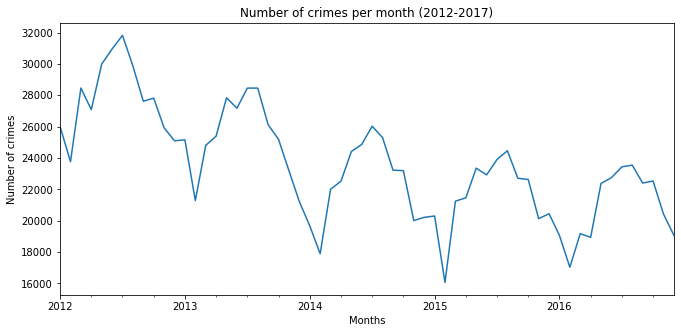

In [24]:
plt.figure (figsize=(11,5))

#resampling time series by months
df.resample ('M').size () .plot (legend=False)
plt.title ('Number of crimes per month (2012-2017)')
plt.xlabel ('Months')
plt. ylabel('Number of crimes')
plt.show()

### Building a model using K - Means Clustering

In [25]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

In [26]:
km = KMeans(n_clusters=4)
km.fit(sub_data)
y = km.predict(sub_data)
labels = km.labels_
sub_data['Cluster'] = y

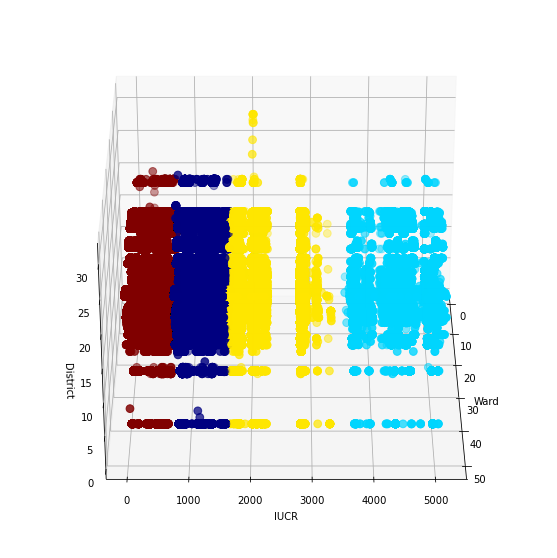

In [27]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data['Ward'])
y = np.array(sub_data['IUCR'])
z = np.array(sub_data['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data["Cluster"], s=60, cmap="jet")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

In [28]:
crime_data=pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

In [29]:
crime_data = crime_data.dropna()
crime_data.isnull().sum().sum()
keep_cols = ['Arrest','Primary Type','Domestic','District','Location Description','X Coordinate','Y Coordinate']
crime_data = crime_data[keep_cols].reset_index()
crime_data.head()

,index,Arrest,Primary Type,Domestic,District,Location Description,X Coordinate,Y Coordinate
0,0,True,BATTERY,True,10.0,APARTMENT,1154907.0,1893681.0
1,1,False,BATTERY,True,3.0,RESIDENCE,1183066.0,1864330.0
2,2,False,PUBLIC PEACE VIOLATION,False,15.0,STREET,1140789.0,1904819.0
3,3,False,BATTERY,False,15.0,SIDEWALK,1143223.0,1901475.0
4,4,False,THEFT,True,15.0,RESIDENCE,1139890.0,1901675.0


In [30]:
percentage_intances = crime_data.groupby('Arrest').size() * 100 / len(crime_data)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

Arrest
False    73.839103
True     26.160897
dtype: float64
------------------
Percentage Positive Instance = 26.160896525224466
Percentage Negative Instance = 73.83910347477553 


In [31]:
len(crime_data['Location Description'].unique().tolist())

140

In [32]:
X=crime_data.drop('Arrest',axis=1)
features = list(X.columns)
y = crime_data["Arrest"]

In [33]:
X.head()

,index,Primary Type,Domestic,District,Location Description,X Coordinate,Y Coordinate
0,0,BATTERY,True,10.0,APARTMENT,1154907.0,1893681.0
1,1,BATTERY,True,3.0,RESIDENCE,1183066.0,1864330.0
2,2,PUBLIC PEACE VIOLATION,False,15.0,STREET,1140789.0,1904819.0
3,3,BATTERY,False,15.0,SIDEWALK,1143223.0,1901475.0
4,4,THEFT,True,15.0,RESIDENCE,1139890.0,1901675.0


In [34]:
labelencoder = LabelEncoder()
X['Primary Type']=X['Primary Type'].astype("category").cat.codes
X['Location Description']=X['Location Description'].astype("category").cat.codes

In [35]:
scaler = preprocessing.MinMaxScaler()
X[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(X[['X Coordinate', 'Y Coordinate']])

In [36]:
X.head()

,index,Primary Type,Domestic,District,Location Description,X Coordinate,Y Coordinate
0,0,2,True,10.0,17,0.958334,0.970336
1,1,2,True,3.0,109,0.981701,0.955296
2,2,27,False,15.0,125,0.946619,0.976043
3,3,2,False,15.0,121,0.948639,0.974329
4,4,31,True,15.0,109,0.945873,0.974432


In [37]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)
predicted = dt_clf.predict(X[features])
recall_score = metrics.recall_score(crime_data['Arrest'], predicted)
precision_score = metrics.precision_score(crime_data['Arrest'], predicted)
accuracy_score = metrics.accuracy_score(crime_data['Arrest'], predicted)
print("Training Accuracy = {} Precision = {} Recall = {}".format(accuracy_score,precision_score,recall_score))

Training Accuracy = 1.0 Precision = 1.0 Recall = 1.0


In [38]:
for depth in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_clf.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_clf, X, y,scoring='accuracy', cv=10, n_jobs=1))
    print("Depth: %i Accuracy: %.3f" % (depth,score))

Depth: 1 Accuracy: 0.738
Depth: 2 Accuracy: 0.774
Depth: 3 Accuracy: 0.807
Depth: 4 Accuracy: 0.787
Depth: 5 Accuracy: 0.751
Depth: 6 Accuracy: 0.731
Depth: 7 Accuracy: 0.715
Depth: 8 Accuracy: 0.699
Depth: 9 Accuracy: 0.675


In [39]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X,y)
predicted = dt_clf.predict(X[features])
dt_recall = metrics.recall_score(crime_data['Arrest'], predicted)
dt_precision = metrics.precision_score(crime_data['Arrest'], predicted)
dt_accuracy= metrics.accuracy_score(crime_data['Arrest'], predicted)
print("Accuracy for DT =",dt_accuracy)
print("Precision for DT =",dt_precision)
print("Recall for DT =",dt_precision)

Accuracy for DT = 0.8368036436319283
Precision for DT = 0.9701382947908738
Recall for DT = 0.9701382947908738


### The Accuracy of model using decision tree is 83%

In [40]:
importances=dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
# We have taken the top 5 feature 
print("The main features used for classification")
print(X.columns[indices[:5]])
print("Top main feature is",X.columns[indices[:1]][0])

Feature ranking:
The main features used for classification
Index(['Primary Type', 'Domestic', 'index', 'Y Coordinate', 'X Coordinate'], dtype='object')
Top main feature is Primary Type


In [41]:
# Applying 10 fold cross validation
dt_cv_accuracy = cross_val_score(dt_clf, X, y, cv=10).mean()
dt_cv_precision= cross_val_score(dt_clf, X, y, cv=10, scoring='precision').mean()
dt_cv_recall = cross_val_score(dt_clf, X, y, cv=10, scoring='recall').mean()
print("Cross Validation Accuracy DT:", dt_cv_accuracy)
print("Cross Validation Recall DT:", dt_cv_precision)
print("Cross Validation Precision DT:", dt_cv_recall)

Cross Validation Accuracy DT: 0.8070109653216931
Cross Validation Recall DT: 0.9044432121362369
Cross Validation Precision DT: 0.41181743219781686
